Matlab
====

## Unit 16, Lecture 1

*Numerical Methods and Statistics*

----

#### Prof. Andrew White,  March 24, 2016

Difference between JupyterHub and Your Machine
----

1. Has many default nbextensions, like spell-check and line numbers
2. MathJax Chrome bug is fixed
3. Has Matlab and Python 2 options
4. Can download nice pdf versions of notebooks

Adding Packages
---

You can install packages using either of these two:

```python
%system conda install [package]
%system pip install [package]
```

These will persist as long as your files in `local`

Switching between programming languages
---

You can switch between the different programming languages using the `%%matlab` or `%%python` cell magic. It's best to use the python 3 kernel and switch as needed, unless you're exclusively using matlab or R

Matlab
===

Matlab is a proprietary programming language and suite of tools made by Mathworks. Matlab is the most commonly used alternative to Python in engineering. It is generally more common than Python in engineering. It is usually used through the Matlab application, which is a java-based program.

Starting Matlab in a notebook
---

We're going to be using Matlab in Jupyter notebooks. Here's how you enable matlab in a python notebook. Note, you can also just start a Matlab notebook

In [1]:
#you must do this to enable Matlab in a non-matlab notebook
%load_ext pymatbridge 

/opt/conda/lib/python3.5/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-e89cfb0d-389a-45c5-aa0f-ee954de1b066
Send 'exit' command to kill the server
......MATLAB started and connected!


Matlab Basics
---

Matlab has very similar syntax to Python. The main difference in general arithmetic is that Matlab includes all the math/array creation functions by default. Let's compare some examples

In [2]:
#Python
import numpy as np

b = 4
x = np.linspace(0,10, 5)
y = x * b

print(y)

[  0.  10.  20.  30.  40.]


In [3]:
%%matlab

b = 4;
x = linspace(0,10,5);
y = b .* x


y =

     0    10    20    30    40



There are three main differences we can spot:

* Matlab doesn't require any imports or prefixes for linspace
* Matlab requires a `;` at the end to suppress  output. If you don't end with a `;`, Matlab will tell you about that line. 
* In `numpy`, all arithmetic operations are by default element-by-element. In Matlab, arithmetic operations are by default their matrix versions. So you put a `.` to indicate element-by-element

Working with matrices
===

$$
\left[\begin{array}{lr}
4 & 3\\
-2 & 1\\
\end{array}\right]
\left[\begin{array}{c}
2\\
6\\
\end{array}\right]
=
\left[\begin{array}{c}
26\\
2\\
\end{array}\right]
$$

In [4]:
x = np.array([[4,3], [-2, 1]])
y = np.array([2,6]).transpose()
print(x.dot(y))

[26  2]


In [5]:
%%matlab

x = [4, 3; -2, 1];
y = [2,6]';
x * y


ans =

    26
     2



You can see here that Matlab doesn't distinguish between lists, which can grow/shrink, and arrays, which are fixed size

In [6]:
x = [2,5]
x.append(3)
x

[2, 5, 3]

In [7]:
%%matlab

x = [5,2];
x = [x 3]


x =

     5     2     3



Since Matlab variables are always fixed length, you must create new ones to to change size

Many of the same commands we used have the same name in matlab

In [25]:
import scipy.linalg as lin

example = np.random.random( (3,3) )
lin.eig(example)

(array([ 1.29540814+0.j, -0.38837468+0.j,  0.34495757+0.j]),
 array([[-0.48296954, -0.65051523,  0.40230502],
        [-0.53613462,  0.21791595, -0.68792316],
        [-0.69231503,  0.72755933,  0.60407979]]))

In [27]:
%%matlab

example = rand(3,3);
eig(example)


ans =

   1.8146 + 0.0000i
   0.2757 + 0.3061i
   0.2757 - 0.3061i



Slicing
---

Slicing is nearly the same, except Matlab starts at 1 and includes both the start and end of the slice. Matlab uses parenthesis instead of brackets

In [8]:
%%matlab

x = 1:10;
%this is how you make comments BTW, the % sign
x(1) 
x(1:2)
x(1:2:5) 


ans =

     1


ans =

     1     2


ans =

     1     3     5



In [9]:
x = list(range(1,11))
print(x[0])
print(x[0:2])
print(x[0:6:2])

1
[1, 2]
[1, 3, 5]


Program flow control
---

All the same flow statements from Python exist

In [10]:
for i in range(3):
    print(i)

print('now with a list')
x = [2,5]
for j in x:
    print(j)

0
1
2
now with a list
2
5


Matlab can only iterate in for loops on integers. Thus, to iterate over elements of an array, you need use this syntax:

In [11]:
%%matlab

for i = 0:2
    i
end
'now with a list'
x = [2, 5]
n = size(x)
for j = 1:n
    j
end


i =

     0


i =

     1


i =

     2


ans =

now with a list


x =

     2     5


n =

     1     2


j =

     1



If statements are similar. `and` is replaced by `&`, `or` by `|` and `not` by `~`

In [12]:
%%matlab

a = -3;

if a < 0 & abs(a) > 2
    a * 2
end

if ~(a == 3 | a ~= 3)
    'foo'
end


ans =

    -6



Creating functions in Matlab
---

In Matlab, you always define functions in another file and then read them in. You can use the `writefile` cell magic to do this

In [13]:
%%writefile compute_pow.m
function[result] = compute_pow(x, p)
%this function computes x^p
result = x ^ p;

Overwriting compute_pow.m


In [14]:
%%matlab
compute_pow(4,2)


ans =

    16



If you modify the file, you have to force matlab to reload your function:

In [15]:
%%matlab

clear compute_pow

Plotting
===

The matplotlib was inspired by Matlab's plotting, so many of the functions are similar. 

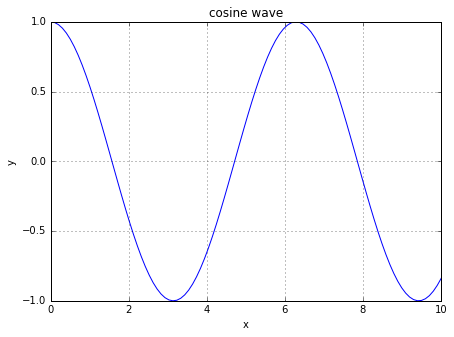

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,100)
y = np.cos(x)

plt.figure(figsize=(7,5))
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('cosine wave')
plt.show()

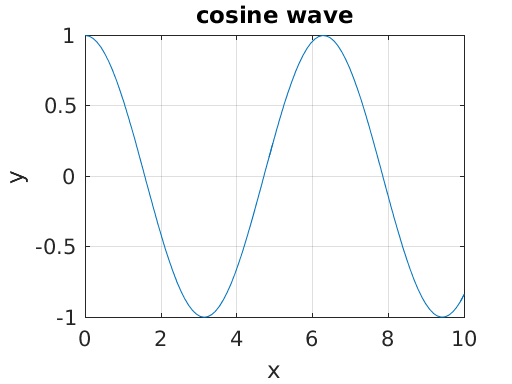

In [20]:
%%matlab

x = linspace(0,10,100);
y = cos(x);

plot(x,y)
grid on
xlabel('x')
ylabel('y')
title('cosine wave')

Example - Solving and plotting an Optimization Problem
---

Minimize 

$$f(x) = (x - 4)^2 $$

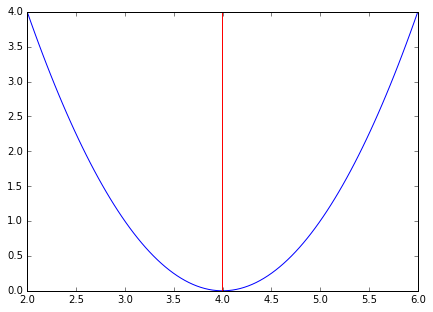

In [48]:
from scipy.optimize import *

def fxn(x):
    return (x - 4)**2

x_min = newton(fxn,x0=0)

plt.figure(figsize=(7,5))
x_grid = np.linspace(2,6,100)
plt.plot(x_grid, fxn(x_grid))
plt.axvline(x_min, color='red')
plt.show()

In [39]:
%%writefile my_obj.m
function[y] = my_obj(x)
%be careful to use .^ here so that we can pass matrices to this method
y = (x - 4).^2;

Overwriting my_obj.m


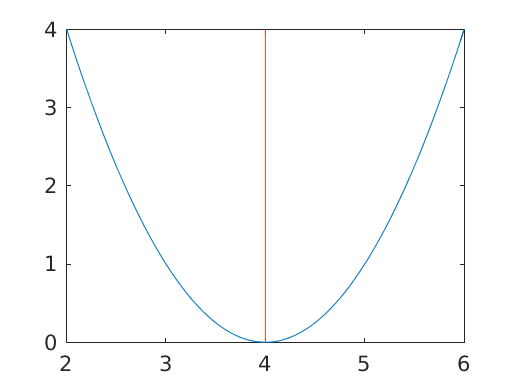

In [47]:
%%matlab

[x_min, fval] = fminsearch(@my_obj, 0);

x_grid = linspace(2,6,100);
plot(x_grid, my_obj(x_grid));
hold on
ylimits=get(gca,'ylim');
plot([x_min, x_min], ylimits)

There are a few key differences to note:

1. When referring to a function in matlab, you have to put an `@` if you're not calling it
2. There is not an easy way to plot a vertical line in matlab, so you have to plot a line from the lowest y-value to highest y-value
3. Be careful about making sure your function can handle matrices

Learning Matlab
---

You currently know many numerical methods. The key to learning Matlab is using their online documentation and judicious web searches. For example, if you want to solve two equations you know you could use a root-finding method. A bing search would bring you to the `fsolve` method.

Excel
===

Excel is a pretty self-explanatory program. I'm just going to show you some advanced things which you may not already know.

* References
* Dragging equations
* Auto-fill
* Optimization -> solver add-in
* Statistics -> data analysis add in for rn
* Matrix-functions -> ctrl-shift
* Text parsing -> past-special, to delete blanks go to find-select and then delete
* Importing data from Excel

Pandas
---

Pandas is a library that can read data from many formats, including excel. It also has some built in graphing/analysis tools.

In [12]:
import pandas as pd

data =  pd.read_excel('fuel_cell.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 676
Data columns (total 16 columns):
Time           677 non-null float64
Voltage        677 non-null float64
Current        677 non-null float64
Power          677 non-null float64
Efficiency     677 non-null float64
Resistance     677 non-null float64
Control Sig    677 non-null float64
Fan %          677 non-null int64
H2 In          677 non-null float64
H2 Out         677 non-null float64
Cell 1         677 non-null float64
Cell 2         677 non-null float64
Cell 3         677 non-null float64
Cell 4         677 non-null float64
RH %           677 non-null float64
Temperature    677 non-null float64
dtypes: float64(15), int64(1)
memory usage: 89.9 KB


You can access data in two ways:

In [10]:
data.Resistance[0:10]

0    6.480769
1    6.480769
2    6.538961
3    6.461538
4    6.448718
5    6.461538
6    6.545455
7    6.474359
8    6.551948
9    6.467949
Name: Resistance, dtype: float64

In [11]:
data.ix[0:10, 3]

0     0.940061
1     0.940061
2     0.924337
3     0.937271
4     0.935411
5     0.937271
6     0.925255
7     0.939131
8     0.926173
9     0.938201
10    0.924337
Name: Power, dtype: float64

In [ ]:
%system jupyter nbconvert unit_10_lecture_1.ipynb --to slides --post serve